In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
 

#讀取資料

In [4]:
X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])

In [5]:
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

#繪製試圖

<function matplotlib.pyplot.show>

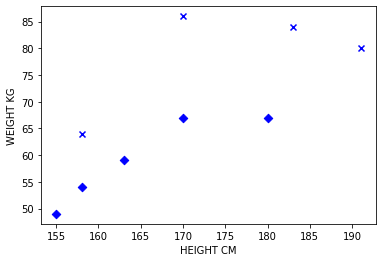

In [6]:
plt.figure()
plt.xlabel("HEIGHT CM")
plt.ylabel("WEIGHT KG")

for i,x in enumerate(X_train):
  plt.scatter(x[0],x[1],marker="x" if y_train[i] == 'male' else "D",c = "b")
plt.show

#KNN計算

In [7]:
x = np.array([[155,70]])

In [8]:
D = np.sqrt(np.sum((X_train-x)**2,axis=1))
D

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [9]:
n_index =D.argsort()
n_index

array([0, 5, 8, 7, 4, 1, 6, 2, 3])

In [10]:
n_index_k = n_index[:3]
n_index_k

array([0, 5, 8])

In [11]:
n_index_k_name = np.take(y_train,n_index_k)
n_index_k_name

array(['male', 'female', 'female'], dtype='<U6')

In [12]:
from collections import Counter
r = Counter(n_index_k_name)
r

Counter({'female': 2, 'male': 1})

In [13]:
r.most_common(1)[0][0]

'female'

#CNN機器學習

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.preprocessing import LabelBinarizer

In [16]:
lb = LabelBinarizer()
y_train_b = lb.fit_transform(y_train)
y_train_b

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [17]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train_b.reshape(-1))

KNeighborsClassifier(n_neighbors=3)

In [18]:
clf.predict([[155,70]])

array([0])

In [19]:
lb.inverse_transform(clf.predict([[155,70]])[0])

array(['female'], dtype='<U6')

#iris資料集

In [20]:
from sklearn import datasets

In [21]:
iris = datasets.load_iris()
X = iris.data

In [22]:
X.shape

(150, 4)

In [23]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
from sklearn.model_selection import train_test_split
Xi_train, Xi_test, yi_train, yi_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [32]:
clfi = KNeighborsClassifier(n_neighbors=30)
clfi.fit(Xi_train,yi_train)

KNeighborsClassifier(n_neighbors=30)

In [33]:
clfi.score(Xi_test,yi_test)

0.9777777777777777